   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


C:\Users\Admin\AppData\Local\Temp\ipykernel_10448\4057368949.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


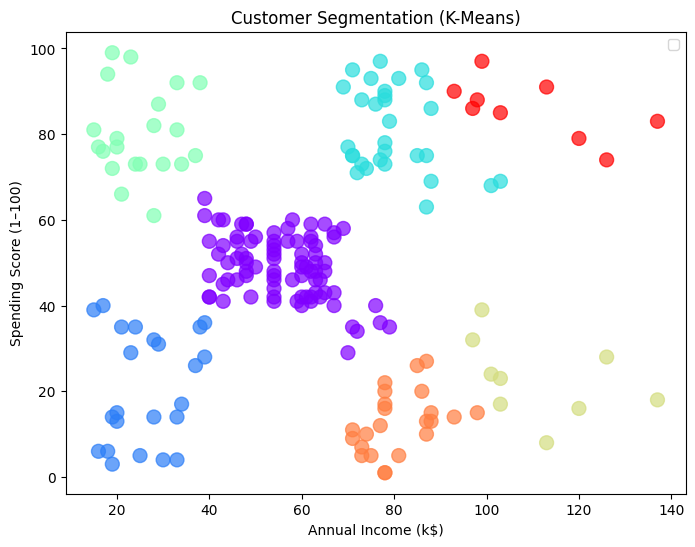

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Read data
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

# Step 2: Encode categorical columns
le = LabelEncoder()
for cols in data.columns:
    if data[cols].dtype == 'object':
        data[cols] = le.fit_transform(data[cols])

# Step 3: Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Step 5: Apply K-Means
hc = AgglomerativeClustering(n_clusters=5,linkage='ward',metric='euclidean')
labels = hc.fit_predict(X_sc)

# Step 6: Assign labels and get centroids
data['clusters'] = labels


# Step 7: Visualize clusters + centroids
plt.figure(figsize=(8,6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
            c=labels, cmap='rainbow', s=100, alpha=0.7)

plt.title('Customer Segmentation (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()
